In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# Convolution2D(filter, Kernel_size, Strides, ...)
classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3), activation = 'relu'))
# Step 2 - Pooling
# pool_size to define a spatial neighborhood to take largest element from the rectified feature map within window
classifier.add(MaxPooling2D(pool_size = (2,2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128,activation = 'relu'))
classifier.add(Dense(1,activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_set = train_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
# Training
history = classifier.fit_generator(training_set, steps_per_epoch = 150, epochs = 20, validation_data = test_set)

Epoch 1/20
150/150 [==============================] - 69s 462ms/step - loss: 0.5808 - accuracy: 0.6956 - val_loss: 0.5750 - val_accuracy: 0.6945
Epoch 2/20
150/150 [==============================] - 58s 388ms/step - loss: 0.5719 - accuracy: 0.7038 - val_loss: 0.5787 - val_accuracy: 0.6975
Epoch 3/20
150/150 [==============================] - 53s 353ms/step - loss: 0.5596 - accuracy: 0.7104 - val_loss: 0.6028 - val_accuracy: 0.6720
Epoch 4/20
150/150 [==============================] - 51s 338ms/step - loss: 0.5506 - accuracy: 0.7142 - val_loss: 0.5606 - val_accuracy: 0.7175
Epoch 5/20
150/150 [==============================] - 49s 324ms/step - loss: 0.5497 - accuracy: 0.7158 - val_loss: 0.5520 - val_accuracy: 0.7295
Epoch 6/20
150/150 [==============================] - 49s 325ms/step - loss: 0.5292 - accuracy: 0.7315 - val_loss: 0.6068 - val_accuracy: 0.6750
Epoch 7/20
150/150 [==============================] - 48s 322ms/step - loss: 0.5284 - accuracy: 0.7337 - val_loss: 0.5794 - val_ac

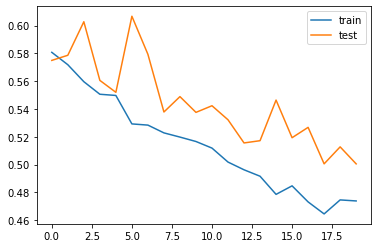

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [41]:
import numpy
from tensorflow.keras.preprocessing import image

test_image = image.load_img('betty2.jpg', target_size = (64,64))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = numpy.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


In [7]:
from tensorflow.keras.models import model_from_json
import numpy
import os

# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [1]:
loaded_model_json

NameError: name 'loaded_model_json' is not defined

In [28]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [30]:
# evaluate loaded model on test data
loaded_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
result = loaded_model.predict(test_image)

# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
